<a href="https://colab.research.google.com/github/onkardc/DesignOptimization2021Fall/blob/main/Homework3_DO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Onkar Chavan**
##ASU id - 1223314248
###MAE 598 Design Optimization Homework 3

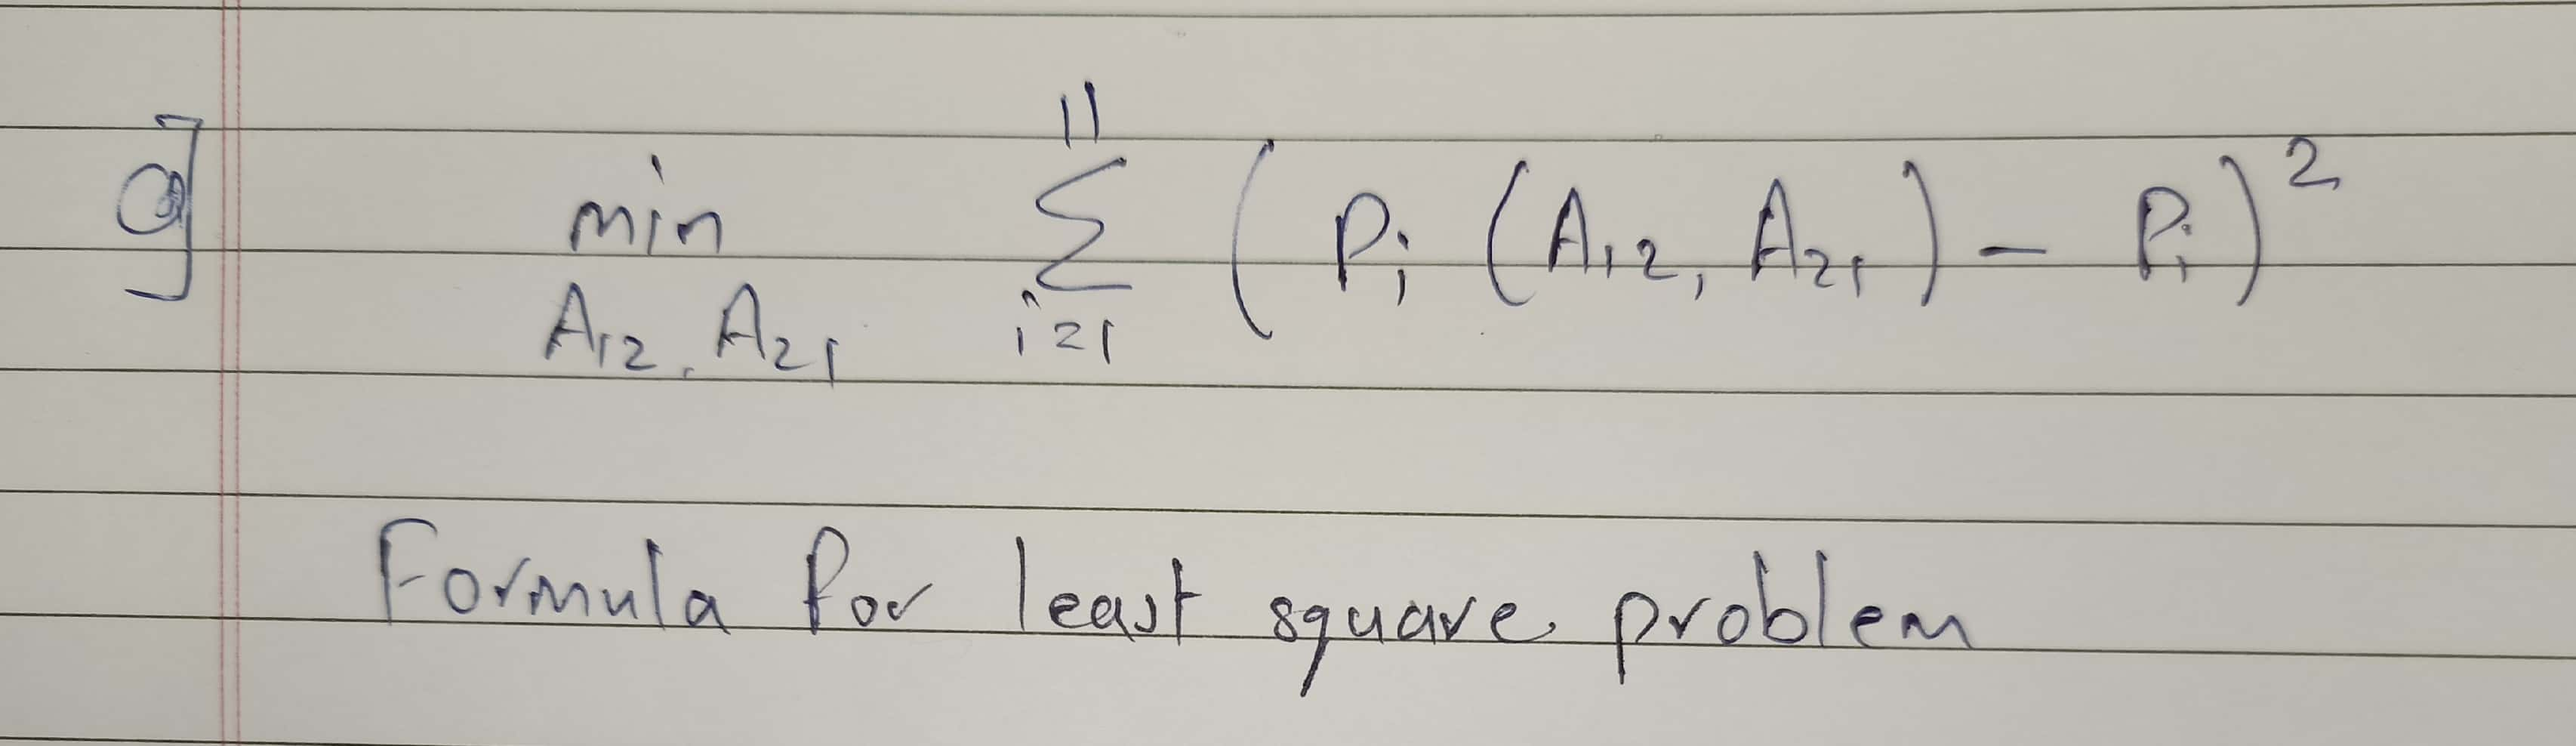

In [10]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=[15,9]

Saturation pressure of water (at T = 20degC) = 17.473251342773438
Saturation pressure of 1,4-dioxane (at T = 20degC) = 28.824098587036133
A12 = 1.9578605
A21 = 1.6896445
Loss function = 0.67023647
Measured values of p = [28.1 34.4 36.7 36.9 36.8 36.7 36.5 35.4 32.9 27.7 17.5]
Calculated values of p = [28.824099 34.641922 36.451233 36.866104 36.87291  36.748795 36.389854
 35.38533  32.949886 27.733051 17.473251]
Difference in calculated and measured values of p = [-0.7240982  -0.24192047  0.24876785  0.0338974  -0.07291031 -0.04879379
  0.11014557  0.01467133 -0.0498848  -0.03305054  0.02674866]


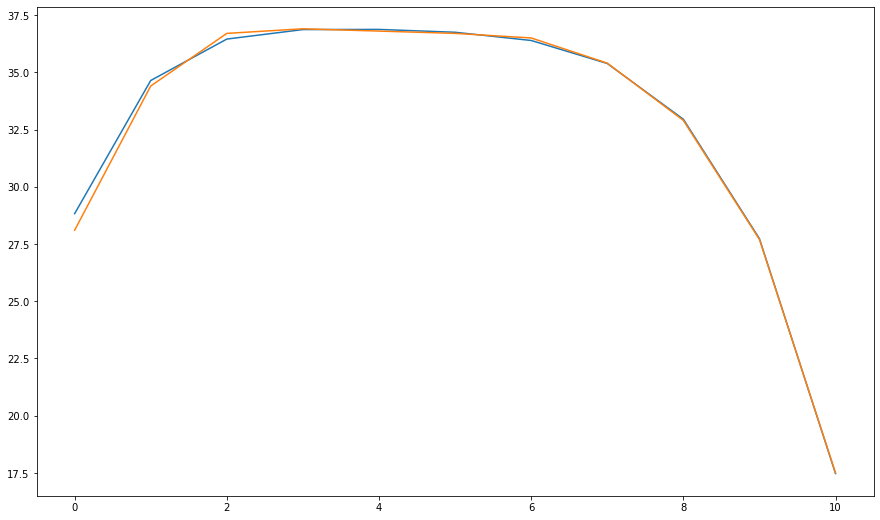

In [15]:
# Problem 1
# Solved using gradient descent
# b)
x1 = Variable(t.tensor([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]), requires_grad=False)
p = Variable(t.tensor([28.1,34.4,36.7,36.9,36.8,36.7,36.5,35.4,32.9,27.7,17.5]), requires_grad=False)

T = 20 
a1=[8.07131, 1730.63, 233.426] #a1 = a_water
a2=[7.43155, 1554.679, 240.337] #a2 = a_1,4-dioxane

# Saturation pressures for water and 1,4-dioxane

psat1 = Variable(t.tensor(10**(a1[0]-(a1[1]/(T+a1[2])))), requires_grad=False)
psat2 = Variable(t.tensor(10**(a2[0]-(a2[1]/(T+a2[2])))), requires_grad=False)
print('Saturation pressure of water (at T = 20degC) =', psat1.item())
print('Saturation pressure of 1,4-dioxane (at T = 20degC) =', psat2.item())

eps = 1e-1 # Termination criterion
A = Variable(t.tensor([10.0, 5.0]), requires_grad=True)

func = lambda A, x1, psat1, psat2:\
        t.dot((p-(x1*psat1*t.exp((A[0]*(A[1]*(1-x1))**2/((A[0]*x1+A[1]*(1-x1))**2)))\
        + (1-x1)*psat2*t.exp((A[1]*((A[0]*x1)**2)/((A[0]*x1+A[1]*(1-x1))**2))))),\
        (p-(x1*psat1*t.exp((A[0]*(A[1]*(1-x1))**2/((A[0]*x1+A[1]*(1-x1))**2)))\
        + (1-x1)*psat2*t.exp((A[1]*((A[0]*x1)**2)/((A[0]*x1+A[1]*(1-x1))**2))))))

def line_search(A,x1,psat1,psat2): #Performing Amijo Line Search
    a = 1.0
    phi = lambda a, A, x1, psat1, psat2: func(A,x1,psat1,psat2) - a * 0.8 * A.grad @ A.grad.transpose(0,0)
    while phi(a,A,x1,psat1,psat2) < func((A - a * A.grad),x1,psat1,psat2):
      a = 0.5 * a
    return a

err = 1

while err >= eps: # Solving using gradiient descent
    loss = func(A,x1,psat1,psat2)
    loss.backward()
    err = A.grad.norm()
   
    with t.no_grad():
        a = line_search(A,x1,psat1,psat2)
        A -= a*A.grad
        A.grad.zero_()

#predp = predicated value of p
predp = (x1*psat1*t.exp((A[0]*(A[1]*(1-x1))**2/((A[0]*x1+A[1]*(1-x1))**2)))\
        + (1-x1)*psat2*t.exp((A[1]*((A[0]*x1)**2)/((A[0]*x1+A[1]*(1-x1))**2))))

print('A12 =',A[0].data.numpy())
print('A21 =',A[1].data.numpy())
print('Loss function =',loss.data.numpy())
print('Measured values of p =',p.data.numpy())
print('Calculated values of p =',predp.data.numpy())
print('Diff in calculated and measured values of p =', (p-predp).data.numpy())

plt.plot(predp.data.numpy())
plt.plot(p.data.numpy())

c) The data fits well with the data as seen from the plot above.

In [38]:
# Problem 2
# Solved using module bayesian-optimization

from bayes_opt import BayesianOptimization
 
def function(x, y):
    return -((4-2.1*x**2+(x**4)/3)*x**2+x*y+(-4+4*y**2)*y**2)
pbounds = {'x': (-3, 3), 'y': (-2, 2)}

optimizer = BayesianOptimization(f=function,pbounds=pbounds,random_state=1)

optimizer.maximize(init_points=2,n_iter=100)
print('The minimum value of function and its corresponding input values are',optimizer.max)

|   iter    |  target   |     x     |     y     |
-------------------------------------------------
|  1        |  0.265    | -0.4979   |  0.8813   |
|  2        | -110.1    | -2.999    | -0.7907   |
|  3        | -14.48    | -2.347    | -0.5245   |
|  4        | -3.791    |  1.98     |  0.6406   |
|  5        | -3.61     | -2.104    |  0.5152   |
|  6        | -20.73    | -2.484    |  1.035    |
|  7        | -8.23     | -0.6262   | -1.354    |
|  8        | -12.31    |  2.326    | -0.2112   |
|  9        |  0.06557  | -0.4062   | -0.5919   |
|  10       | -0.4875   |  0.6594   | -0.4285   |
|  11       |  0.262    |  0.3192   |  0.8082   |
|  12       | -5.892    | -2.109    | -0.3733   |
|  13       | -33.52    | -2.599    |  0.1371   |
|  14       | -2.428    | -0.9648   | -0.9004   |
|  15       | -0.1915   | -1.854    |  0.6938   |
|  16       | -19.85    |  2.459    | -0.3357   |
|  17       | -1.168    | -1.992    |  0.7364   |
|  18       | -0.8146   | -1.931    |  0.6334   |
